<p hidden>$
\newcommand{\phm}{\phantom{-}}
\newcommand{\vb}{\underline{\mathbf{b}}}
\newcommand{\vf}{\underline{\mathbf{f}}}
\newcommand{\vk}{\underline{\mathbf{k}}}
\newcommand{\vx}{\underline{\mathbf{x}}}
\newcommand{\vy}{\underline{\mathbf{y}}}
\newcommand{\deriv}[3][]{\frac{\mathrm{d}^{#1}#2}{\mathrm{d}#3^{#1}}}
\newcommand{\partderiv}[3][]{\frac{\partial^{#1}#2}{\partial#3^{#1}}}
\newcommand{\intd}{\,\mathrm{d}}
\newcommand{\rmd}{\mathrm{d}}
\DeclareMathOperator{\Uniform}{Uniform}
\DeclareMathOperator{\Poisson}{Poisson}
\DeclareMathOperator{\Normal}{Normal}
\DeclareMathOperator{\Exponential}{Exponential}
\DeclareMathOperator{\GammaDist}{Gamma}
\DeclareMathOperator{\Prob}{P}
\DeclareMathOperator{\Exp}{E}
\DeclareMathOperator{\Var}{Var}
$</p>

# Lab 3: Newton's Method for Nonlinear Systems

### Topics

- **Mathematics:**  multidimensional Newton's method; estimating errors when solving linear systems; condition number; numerical calculation of the Jacobian.
- **Python:** using Numpy's `np.linalg.solve` to solve linear systems; generalising an function for single-variable Newton's method to multidimensional Newton's method; testing for convergence of a sequence of vectors.

In [1]:
import numpy as np
np.set_printoptions(linewidth=126) #set the line width so wider arrays don't get wrapped

import scipy.linalg #we will need the hilbert function from here

%matplotlib notebook
import matplotlib.pyplot as plt

## Numpy's function for solving linear systems

Numpy has a way to solve $A\vx = \vb$ using the `np.linalg.solve` function.  For example:
```
x = np.linalg.solve(A, b)
```
Mathematically, this is equivalent to $\vx = A^{-1} \vb$ (although Numpy doesn't actually work out the inverse matrix $A^{-1}$ as this is less efficient and has more issues with round-off error).

In this lab we'll use Numpy's function.

## Multidimensional Newton's method

We want to find a solution to the following nonlinear system of equations
\begin{align*}
  x_2 &= \ln x_1, \\
  x_2 &= \frac{1}{25}(x_1^2 +2x_1-24).
\end{align*}
First, rearrange this system into the form $\vf(\vx) = 0$ on paper, and write down the Jacobian matrix $J$ associated with the system.

Define a function `f` that takes in a vector `x` and returns the value of $\vf$ as a **1-dimensional** Numpy array, and another function `J` that takes in a vector `x` and returns the value of $J$, as a Numpy array:

In [13]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([
        -x2 + np.log(x1),
        -x2+(1/25)*(x1**2+2*x1-24)
        ])

def J(x):
    x1 = x[0]
    return np.array([
        [1/x1, -1], 
        [1/25 * (2*x1 + 2), -1]
    ])


Now look at your Newton's method function `newt` from Lab 1.  You should have a version that tests for convergence to some tolerance `tol` which begins
```
def newt(x, num_iter, func, deriv, tol=1e-4):
```
where `x` is the initial approximation to the solution, `num_iter` is the maximum number of iterations to carry out, `func` and `deriv` are the function to solve with and its derivative, and `tol` is the desired tolerance.

You are going to use this function as a template for doing multidimensional Newton's method.  Copy it into the cell below, rename it `multinewt`, and rename the `deriv` parameter to `jacobian`.  Now, modify the function so that it solves a **system** of equations, rather than just a single equation.  Remember, the key difference is that the variables $\vx$ and $\vf$ are now vectors and, instead of the derivative $\deriv{f}{x}$, we now have a Jacobian matrix $J$.  The parts of the function that you need to modify are:
- `f` will now be the **vector** function you are trying to find the zeros of.
- Instead of `dfdx = ...`, you now need to define `J` to be the results of `jacobian(x)`.
- The **change** $\Delta\vx$ in $\vx$ at each iteration of Newton's method is the solution of the linear system $J\Delta\vx = -\vf$.  Use Numpy's `np.linalg.solve` to solve for `dx`.  Then update the variable `x` by adding `dx`.
- **Change** the line saving the current step to `results.append([k, *x, *f])`.  The `*` puts in the entries of the vector rather than the vector object, and will only work with 1-dimensional arrays or lists.

**Hint:** Try to make sure your function will work solving systems of any dimension (i.e. don't make it only work for 2 components).

Your function should now do the correct multidimensional Newton's method iterations.  However, you still need to modify the convergence test to account for the fact that you are using vectors instead of scalars.  So, instead of using the absolute value (`abs`), you now need to use the infinity norm (`np.linalg.norm(..., np.inf)`) to test whether

$$
  \frac{\left\|\vx^{\left(k+1\right)}-\vx^{\left(k\right)}\right\|_\infty}
       {\left\|\vx^{\left(k+1\right)}\right\|_\infty}
    < \mathtt{tol},
$$

where $\vx^{\left(k\right)}$ is the value of the vector $\vx$ after $k$ iterations.  Note that, by definition $\Delta \vx = \vx^{\left(k+1\right)}-\vx^{\left(k\right)}$.

Like your original Newton's method function, your new function should return all the iterations in a matrix called `results`.  The $k$th row of `results` should contain the values of `k` the vectors `x` and `f` after $k$ iterations.  Hopefully, the final row will contain the solution for `x`.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>

  Use your function to find the solution(s) to the nonlinear system (there may be more than one!).  <b>Hint:</b> Use a graph to find suitable initial approximation(s) to the solution(s).
  
  Check that your answer seems reasonable.
</div>

[[ 0.00000000e+00  7.77625605e+00  2.05680387e+00 -5.05408985e+00 -5.44000000e+00]
 [ 1.00000000e+00  7.72423929e+00  2.04438582e+00 -5.72887558e-03  2.41029380e-02]
 [ 2.00000000e+00  7.72400937e+00  2.04433358e+00 -2.24728216e-05  1.08229727e-04]
 [ 3.00000000e+00  7.72400937e+00  2.04433358e+00 -4.43006520e-10  2.11447748e-09]
 [ 4.00000000e+00  7.72400937e+00  2.04433358e+00  0.00000000e+00 -8.88178420e-16]]


<IPython.core.display.Javascript object>


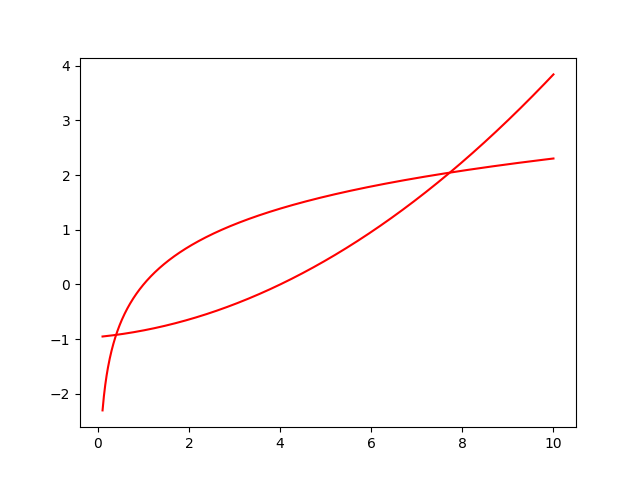

In [14]:
def multinewt(x, func, num_iter, jacobian, tol=1e-10):
    '''Nonlinear systems of equations approximation using Newtons Method'''
    results = []
    for k in range(num_iter):
        prev_value = x
        f = func(x)           
        J = jacobian(x)      
        dx = np.linalg.solve(J, -f)
        x = x + dx
        results.append([k, *x, *f])
        if np.linalg.norm(x-prev_value, np.inf)/np.linalg.norm(x, np.inf) < tol:
            break
        
    return np.array(results)

#(0.5, -1) converges to (0.398, -0.924)
#(7, 7) converges to (7.724, 2.044)
x = np.array([7, 7], dtype=float)
func = f
num_iter = 1000
jacobian = J
print(multinewt(x, func, num_iter, jacobian))
x = np.linspace(0.1, 10, 1000) 
fig, ax = plt.subplots()
func1 = lambda x : np.log(x)
ax.plot(x, func1(x), 'r')
func2 = lambda x : 1/25 * (x**2 + 2*x - 24)
ax.plot(x, func2(x), 'r')


We now take a bit of a detour into ill-conditioned matrices, as covered in lectures last week.

## Errors when solving linear systems

To assess the reliability of any equation solver, you need a way of checking the accuracy of a supposed solution $\vx_1$ to a linear system $A\vx=\vb$.  If we write $\vx$ for the exact solution, then what we'd really like to know is the size of:

$$
  \begin{array}{lll}
    & \left\|\vx-\vx_1\right\| & \text{(the absolute error)}, \\
    \text{or } & \left\|\vx-\vx_1\right\|/\left\|\vx\right\| & \text{(the relative error)}.
  \end{array}
$$

In real life, of course, we do not know what $\vx$ is, so we cannot calculate these numbers.  However, we can use this strategy if we test the equation solver on equations with known solutions.  Such equations are easily constructed.

Start with your favourite non-singular $2 \times 2$ matrix $A$ and vector $\vx$ and define $\vb$ by $\vb=A\vx$.  Now pretend you don't know what $\vx$ is.  Use the `np.linalg.solve` function to find Numpy's solution for $\vx$ using $A$ and $\vb$.

**Hint:** Store the calculated solution in `x1` so you don't overwrite `x`.

Calculate the absolute and relative errors compared to the exact solution $\vx$ (remember to use the infinity norm).  Are they zero? What does this tell you?

Another way to check the accuracy of a supposed solution is to see how well $\vx_1$ fits the given system.  Thus we calculate $\vb_1 = A\vx_1$ and see if $\vb_1$ is close to $\vb$.  The difference $\vb-\vb_1$ is called the **residual vector**.  So we might hope that if the residual vector is small, then $\vx_1$ is a good approximation to the true solution $\vx$.  We measure the size of the residual vector by looking at the one of the following quantities:

$$
  \begin{array}{lll} 
    & \left\|\vb-\vb_1\right\| & \text{(the absolute residual)}, \\
    \text{or } & \left\|\vb-\vb_1\right\|/\left\|\vb\right\| & \text{(the relative residual)}.
  \end{array}
$$

Calculate the absolute and relative residuals.  Are they zero?

You will use both these checking methods, along with the condition number, in the following exercise.  Numpy has a built-in function `np.linalg.cond` which gives the **condition number** of a matrix.

Write a function `errors` that calculates Numpy's solution (using `np.linalg.solve`) and works out the relative error and relative residual for a given matrix $A$ and known solution vector $\vx$.  `errors` should take a matrix `A` and solution vector `x` as parameters, and return the relative error, relative residual, and condition number:
```
return rel_error, rel_resid, cond
```
The multiple outputs (a tuple) can be assigned individual names when you call the function like this:
```
rel_error, rel_resid, cond = errors(A, x)
```

In [5]:
A = np.array([[1, 2], [3, 1]])
x = np.array([[4] , [5]])
b = np.array([[14], [17]])
x1 = np.linalg.solve(A, b)
# Absolute and relative errors are zero
b1 = np.matmul(A,x)
# Absolute and relative residual are zero

def errors(A, x):
    cond = np.linalg.cond(A)
    b = np.matmul(A, x)
    x1 = np.linalg.solve(A, b)
    b1 = np.matmul(A, x1)
    rel_error = np.linalg.norm(x-x1, np.inf)/np.linalg.norm(x, np.inf)
    rel_resid = np.linalg.norm(b-b1, np.inf)/np.linalg.norm(b, np.inf)
    return rel_error, rel_resid, cond


### Hilbert matrices

Hilbert matrices are a badly conditioned type of matrix (that arise if you try to find least squares polynomial fits without using orthogonal polynomials).  Scipy has a function which sets up $n \times n$ Hilbert matrices.  Run `scipy.linalg.hilbert?` to see how to get a Hilbert matrix.

Define $A$ to be the $5 \times 5$ Hilbert matrix, and $\vx$ to be a $5 \times 1$ vector of 1's.

Run `errors` to find the relative error, relative residual, and condition number.

In [6]:
A = scipy.linalg.hilbert(5)
x = np.ones(5)
errors(A, x)

(2.7782220968219917e-12, 9.724581237592612e-17, 476607.2502425855)

Now let's investigate how the errors, residuals and condition number behave for different sized Hilbert matrices.  Below, write a function `hilbert_errors` that runs `errors` so that it calculates the relative error, the relative residual and the condition number for a series of Hilbert matrices of size $n = 2, 3, \ldots$ up to size $n = 15$.

Your function should store the results for each matrix as a row of numbers, `results = []` then `results.append(...)` (as you did in Lab 1), which should contain: the size of the matrix ($n$), the relative error, relative residual and condition number.

**Hint:** You can make a list containing the elements of a tuple using `*` as we did above, e.g. `[n, *errors(...)]`.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>

  <ul>
    <li>What is the first value of $n$ for which the calculated solution is no longer accurate to 4 significant figures?</li>
    <li>Are the residual vectors a good guide to the accuracy of the calculated solution?</li>
    <li>Is the condition number a good guide to the accuracy of the calculated solution?</li>
  </ul>
</div>

In [7]:
def hilbert_errors():
    results = []
    for n in range(2, 16):
        A = scipy.linalg.hilbert(n)
        x = np.ones(n)
        results.append([n, *errors(A, x)])
    return np.array(results)

print(hilbert_errors())
        
# 10
# The Residual Vector oscillates between e-16 and e-17 for the last few matrices, despite the error increasing,
# so it is not a good guide
# The condition number increases as the error increases, so it is a good guide for the accuracy of a solution.

[[2.00000000e+00 6.66133815e-16 0.00000000e+00 1.92814701e+01]
 [3.00000000e+00 9.99200722e-15 0.00000000e+00 5.24056778e+02]
 [4.00000000e+00 6.55031585e-14 0.00000000e+00 1.55137387e+04]
 [5.00000000e+00 2.77822210e-12 9.72458124e-17 4.76607250e+05]
 [6.00000000e+00 2.39341547e-10 1.81260902e-16 1.49510586e+07]
 [7.00000000e+00 1.37975955e-08 8.56370377e-17 4.75367357e+08]
 [8.00000000e+00 1.19096559e-07 8.16984092e-17 1.52575755e+10]
 [9.00000000e+00 7.59430536e-06 1.56979213e-16 4.93153756e+11]
 [1.00000000e+01 1.69190259e-04 1.51619673e-16 1.60244170e+13]
 [1.10000000e+01 1.75728903e-03 1.47055380e-16 5.22270132e+14]
 [1.20000000e+01 6.96107034e-01 1.43106368e-16 1.75159523e+16]
 [1.30000000e+01 7.74190866e+00 6.98224106e-17 3.18839507e+18]
 [1.40000000e+01 8.89973248e+00 1.36577179e-16 6.20078628e+17]
 [1.50000000e+01 1.17546730e+01 2.00749802e-16 3.67568287e+17]]


Now, back to multidimensional Newton's method.

## Numerical approximation of the Jacobian

We have already made a multimensional Newton's method that will work for any function (hopefully it will cope with a 3D system like the one below).  However, it requires a manually derived Jacobian function, which can be a lot of work.  We can instead make our function estimate the Jacobian numerically.  Copy your `multinewt` function into the cell below, and modify it so that it has a default `jacobian` parameter value of `None`, and to have an `h` parameter, like this:
```
def multinewt(x, num_iter, func, jacobian=None, tol=1e-4, h=1e-6):
```
Make your new function use a Jacobian function if one is passed in, and otherwise estimate the Jacobian matrix as follows.  The formula for calculating the partial derivative $\partial f_i/\partial x_j$ numerically is really the same as the formula for ordinary derivatives (which you used at the end of Lab 1):

$$
  \partderiv{f_i}{x_j}
    \approx \frac{f_i(x_1,\ldots,x_j+h,\ldots,x_n )-f_i(x_1,\ldots,x_j,\ldots,x_n)}{h}.
$$

This looks like you might need two two loops, go cover every element of the Jacobian matrix (and that will work), but actually you can do it a whole column at a time, since $f$ produces a vector output.  To do it column-by-column, you will need to evaluate $f$ at the current $x_k$ with $h$ added to one of the elements.  The easiest way to do that is to make a copy of `x` and modify it:
```
xh = x.copy()
xh[i] += h
```

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  Use your function to find the solution to the system
  \begin{align*}
    x_1^2 - x_1 x_2 - 10 &= 0 \\
    x_2 + 3x_1 x_2^2 - 57 &= 0 \\
    x_1 + x_2 - 2x_3 &= 0
  \end{align*}
  using an initial approximation of $\vx = (1.5, 3.5, 2.5)$.  Check that your answer gives a small residual.
</div>

In [11]:
def multinewt(x, func, num_iter, jacobian=None, tol=1e-10, h=1e-6):
    '''Nonlinear systems of equations approximation using Newtons Method'''
    if jacobian == None:
        def jacobian(x):
            f = func(x)
            J = np.zeros((len(f), len(x)), dtype=float)
            for j in range(len(x)):
                xh = x.copy()
                xh[j] += h
                column = (func(xh) - f)/h
                J[:,j] = column
            return J
            
    results = []
    for k in range(num_iter):
        prev_value = x
        f = func(x)           
        J = jacobian(x)
        dx = np.linalg.solve(J, -f)
        _, residual_error, _ = errors(J, -f)
        x = x + dx
        results.append([k, *x, *f, residual_error])
        if np.linalg.norm(x-prev_value, np.inf)/np.linalg.norm(x, np.inf) < tol:
            break
        
    return np.array(results)


def f(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    value_1 = x1**2 - x1*x2 - 10
    value_2 = x2 + 3*x1*(x2**2) - 57
    value_3 = x1 + x2 - 2*x3
    return np.array([value_1, value_2, value_3], dtype=float)
    
x0 = np.array([1.5, 3.5, 2.5])

print(multinewt(x0, f, 1000))


[[ 0.00000000e+00  1.23054593e+01 -8.76847925e+00  1.76849005e+00 -1.30000000e+01  1.62500000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  5.52539791e+00 -6.89856781e+00 -6.86584946e-01  2.49324495e+02  2.77259259e+03  0.00000000e+00
   1.04859162e-17]
 [ 2.00000000e+00  2.69103664e+00 -5.49190527e+00 -1.40043432e+00  5.86473542e+01  7.24966433e+02 -3.27081562e-09
   2.90193975e-18]
 [ 3.00000000e+00  1.89256759e+00 -4.25146866e+00 -1.17945054e+00  1.20205965e+01  1.81001352e+02  1.58506097e-10
   1.53824578e-17]
 [ 4.00000000e+00  1.89737673e+00 -3.37083800e+00 -7.36730632e-01  1.62800386e+00  4.13729280e+01 -9.81366099e-11
   1.14130243e-17]
 [ 5.00000000e+00  1.93837462e+00 -3.21822614e+00 -6.39925762e-01 -4.21195710e-03  4.30626912e+00 -1.94471328e-10
   1.10272316e-17]
 [ 6.00000000e+00  1.93930248e+00 -3.21719064e+00 -6.38944082e-01 -4.57597801e-03  8.89235309e-03 -1.23918653e-11
   1.48865818e-17]
 [ 7.00000000e+00  1.93930238e+00 -3.21719107e+00 -6.38944345e-01 -1.